<a href="https://colab.research.google.com/github/dahlia52/Commercial-District-Analysis/blob/main/code/%EB%8C%80%EC%A4%91%EA%B5%90%ED%86%B5_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

df = pd.read_csv('./raw data/서울시 우리마을가게 상권분석서비스(상권-집객시설)_20230313.csv', encoding='cp949')
market = pd.read_csv('./참고 파일/광진구 상권.csv', encoding='utf-8') #매칭용 파일

In [ ]:
df.head(3)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,집객시설_수,관공서_수,은행_수,종합병원_수,...,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수
0,2022,4,A,골목상권,2110332,돌곶이역 3번,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,2022,4,R,전통시장,2130133,우이골목시장(우이시장),4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,4,A,골목상권,2110367,강북구청,13,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [ ]:
market.head(3)

,시군구명,행정동명,상권_구분_코드_명,상권_코드_명,경도,위도,엑스좌표_값,와이좌표_값,행정동코드,상권_코드,상권_구분_코드,법정동명
0,광진구,군자동,골목상권,세종대학교,127.074085,37.555226,206732,450331,11215730,2110149,A,군자동
1,광진구,중곡제1동,골목상권,중곡1동 마을마당,127.074513,37.564290,206769,451337,11215740,2110150,A,중곡동
2,광진구,구의제1동,골목상권,광진경찰서,127.081126,37.546446,207355,449357,11215850,2110160,A,구의동


In [ ]:
### 광진구 상권에 해당하는 경우만 저장
dff = df.merge(market, how = 'inner')
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1427
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준_년_코드     1428 non-null   int64  
 1   기준_분기_코드    1428 non-null   int64  
 2   상권_구분_코드    1428 non-null   object 
 3   상권_구분_코드_명  1428 non-null   object 
 4   상권_코드       1428 non-null   int64  
 5   상권_코드_명     1428 non-null   object 
 6   집객시설_수      1428 non-null   int64  
 7   관공서_수       553 non-null    float64
 8   은행_수        491 non-null    float64
 9   종합병원_수      13 non-null     float64
 10  일반_병원_수     79 non-null     float64
 11  약국_수        846 non-null    float64
 12  유치원_수       280 non-null    float64
 13  초등학교_수      0 non-null      float64
 14  중학교_수       0 non-null      float64
 15  고등학교_수      0 non-null      float64
 16  대학교_수       18 non-null     float64
 17  백화점_수       24 non-null     float64
 18  슈퍼마켓_수      157 non-null    float64
 19  극장_수        60 non-null    

In [ ]:
dff.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '집객시설_수', '관공서_수', '은행_수', '종합병원_수', '일반_병원_수', '약국_수', '유치원_수',
       '초등학교_수', '중학교_수', '고등학교_수', '대학교_수', '백화점_수', '슈퍼마켓_수', '극장_수',
       '숙박_시설_수', '공항_수', '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수', '시군구명',
       '행정동명', '경도', '위도', '엑스좌표_값', '와이좌표_값', '행정동코드', '법정동명'],
      dtype='object')

In [ ]:
public = dff[['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명','공항_수', '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수', '시군구명', '행정동명', '경도', '위도', '행정동코드', '법정동명']].copy()
public.head() # 기본 정보 + 대중교통 컬럼만 저장

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수,시군구명,행정동명,경도,위도,행정동코드,법정동명
0,2022,4,A,골목상권,2110160,광진경찰서,NaN,NaN,NaN,NaN,NaN,광진구,구의제1동,127.081126,37.546446,11215850,구의동
1,2022,3,A,골목상권,2110160,광진경찰서,NaN,NaN,NaN,NaN,NaN,광진구,구의제1동,127.081126,37.546446,11215850,구의동
2,2022,2,A,골목상권,2110160,광진경찰서,NaN,NaN,NaN,NaN,NaN,광진구,구의제1동,127.081126,37.546446,11215850,구의동
3,2022,1,A,골목상권,2110160,광진경찰서,NaN,NaN,NaN,NaN,NaN,광진구,구의제1동,127.081126,37.546446,11215850,구의동
4,2021,4,A,골목상권,2110160,광진경찰서,NaN,NaN,NaN,NaN,NaN,광진구,구의제1동,127.081126,37.546446,11215850,구의동


In [ ]:
public.isna().sum() #1400개 이상 결측값인 열 지우기

기준_년_코드          0
기준_분기_코드         0
상권_구분_코드         0
상권_구분_코드_명       0
상권_코드            0
상권_코드_명          0
공항_수          1428
철도_역_수        1428
버스_터미널_수      1404
지하철_역_수       1279
버스_정거장_수       337
시군구명             0
행정동명             0
경도               0
위도               0
행정동코드            0
법정동명             0
dtype: int64

In [ ]:
public.drop(['공항_수', '철도_역_수', '버스_터미널_수'], axis=1, inplace=True)

In [ ]:
print(public['지하철_역_수'].min(), public['버스_정거장_수'].min())

1.0 1.0


In [ ]:
# 지하철 역, 정류장의 최소값이 전부 1이므로 결측값은 0으로 채우기
public = public.fillna(0)

In [ ]:
public = public.astype({'지하철_역_수':'int32', '버스_정거장_수':'int32'}) #변수 타입 변환

In [ ]:
# 전처리된 파일 저장
public.to_csv('광진구 상권별 대중교통 정류장 수_20230313.csv', encoding='utf-8-sig')

상권별 대중교통 현황 파악
- 어느 동에 버스 정거장, 지하철역이 많은가(행정동)
1. 2022-4분기만 우선적으로 파악
2. 증감 추이 보기

In [ ]:
%matplotlib inline
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus']=False

In [ ]:
recent = public[(public['기준_년_코드'] == 2022) & (public['기준_분기_코드'] == 4)].copy() #2022 4분기만 저장
recent = recent.reset_index(drop=True)
recent.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,지하철_역_수,버스_정거장_수,시군구명,행정동명,경도,위도,행정동코드,법정동명
0,2022,4,A,골목상권,2110160,광진경찰서,0,0,광진구,구의제1동,127.081126,37.546446,11215850,구의동
1,2022,4,A,골목상권,2110148,어린이대공원역 3번,0,0,광진구,화양동,127.073784,37.548172,11215710,화양동
2,2022,4,D,발달상권,2120055,군자역,2,14,광진구,군자동,127.077350,37.560279,11215730,군자동
3,2022,4,A,골목상권,2110162,군자역 4번,0,0,광진구,중곡제2동,127.081584,37.560897,11215750,중곡동
4,2022,4,A,골목상권,2110140,건대입구역 6번,0,3,광진구,자양제4동,127.063843,37.541492,11215847,자양동


In [ ]:
temp = recent.groupby(['법정동명', '행정동명']).agg({"지하철_역_수":'sum', "버스_정거장_수":'sum'})
temp = temp.sort_values(by = '버스_정거장_수', ascending=False).reset_index(drop=False)
temp

,법정동명,행정동명,지하철_역_수,버스_정거장_수
0,중곡동,중곡제4동,0,23
1,화양동,화양동,2,21
2,구의동,구의제1동,1,20
3,군자동,군자동,2,18
4,능동,능동,1,18
5,중곡동,중곡제3동,1,16
6,자양동,자양제2동,0,12
7,중곡동,중곡제1동,0,12
8,구의동,구의제3동,1,11
9,중곡동,중곡제2동,0,10


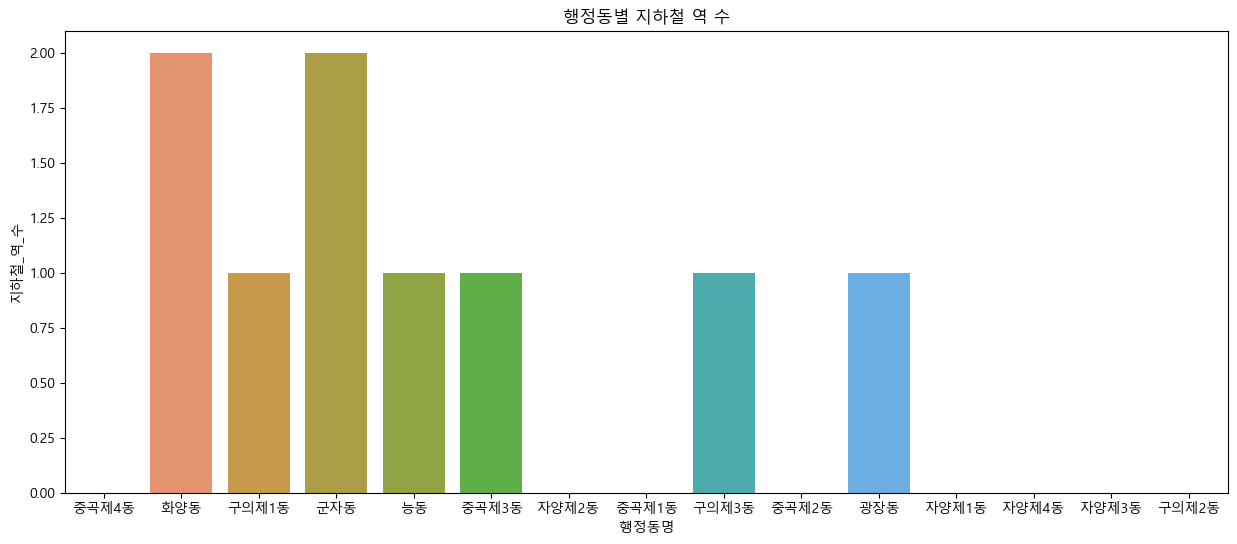

In [ ]:
plt.figure(figsize = (15,6))
ax = sns.barplot(x = '행정동명', y = '지하철_역_수', data = temp, errorbar=('ci', False))
plt.title("행정동별 지하철 역 수")
plt.show() # 군자동, 화양동에 주로 지하철이 다닌다

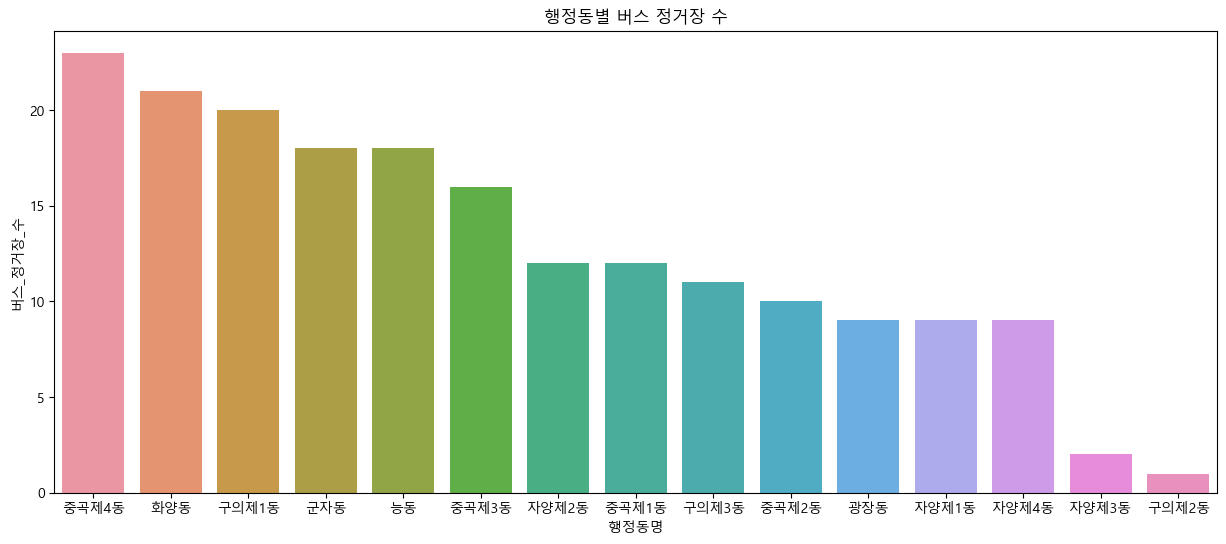

In [ ]:
plt.figure(figsize = (15,6))
ax = sns.barplot(x = '행정동명', y = '버스_정거장_수', data = temp, errorbar=('ci', False))
plt.title("행정동별 버스 정거장 수")
plt.show() # 중곡4동에 버스정류장이 가장 많다. 자양3동과 구의2동은 다른 동에 비해 정거장이 적다

In [ ]:
public.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,지하철_역_수,버스_정거장_수,시군구명,행정동명,경도,위도,행정동코드,법정동명
0,2022,4,A,골목상권,2110160,광진경찰서,0,0,광진구,구의제1동,127.081126,37.546446,11215850,구의동
1,2022,3,A,골목상권,2110160,광진경찰서,0,0,광진구,구의제1동,127.081126,37.546446,11215850,구의동
2,2022,2,A,골목상권,2110160,광진경찰서,0,0,광진구,구의제1동,127.081126,37.546446,11215850,구의동
3,2022,1,A,골목상권,2110160,광진경찰서,0,0,광진구,구의제1동,127.081126,37.546446,11215850,구의동
4,2021,4,A,골목상권,2110160,광진경찰서,0,0,광진구,구의제1동,127.081126,37.546446,11215850,구의동


In [ ]:
### 연도 및 분기별 비교
time = public.groupby(['기준_년_코드', '기준_분기_코드']).agg({'지하철_역_수':'sum', '버스_정거장_수':'sum'}).sort_values(by = ['기준_년_코드', '기준_분기_코드'])
time = time.reset_index(drop=False)
time

,기준_년_코드,기준_분기_코드,지하철_역_수,버스_정거장_수
0,2017,1,6,186
1,2017,2,6,186
2,2017,3,6,186
3,2017,4,6,186
4,2018,1,7,190
5,2018,2,7,190
6,2018,3,7,190
7,2018,4,7,190
8,2019,1,7,190
9,2019,2,7,190


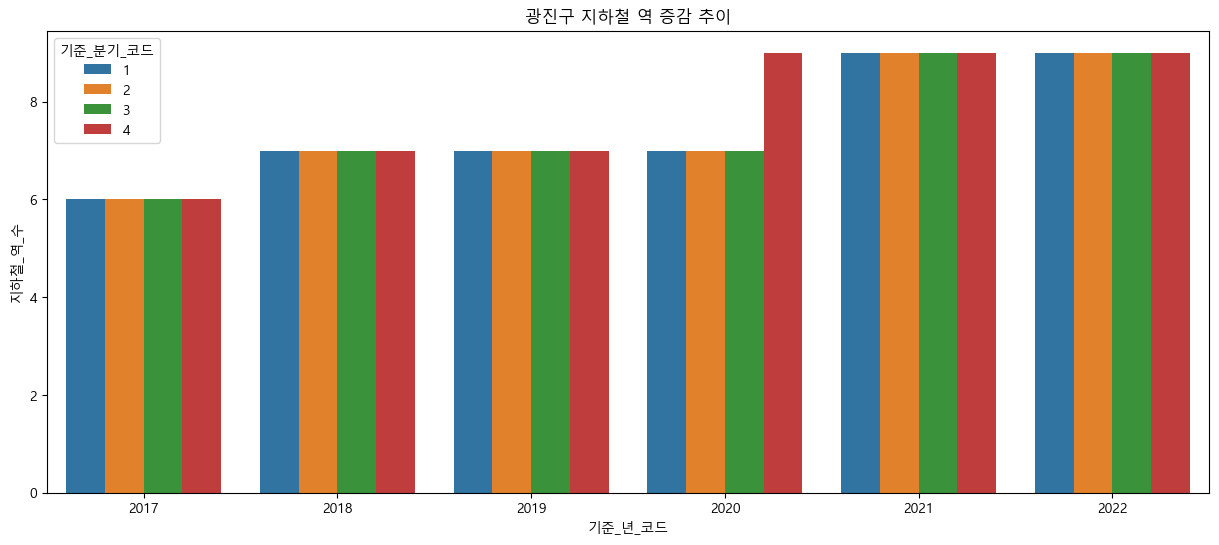

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(x='기준_년_코드', y='지하철_역_수', data = time, hue='기준_분기_코드')
plt.title("광진구 지하철 역 증감 추이")
plt.show()

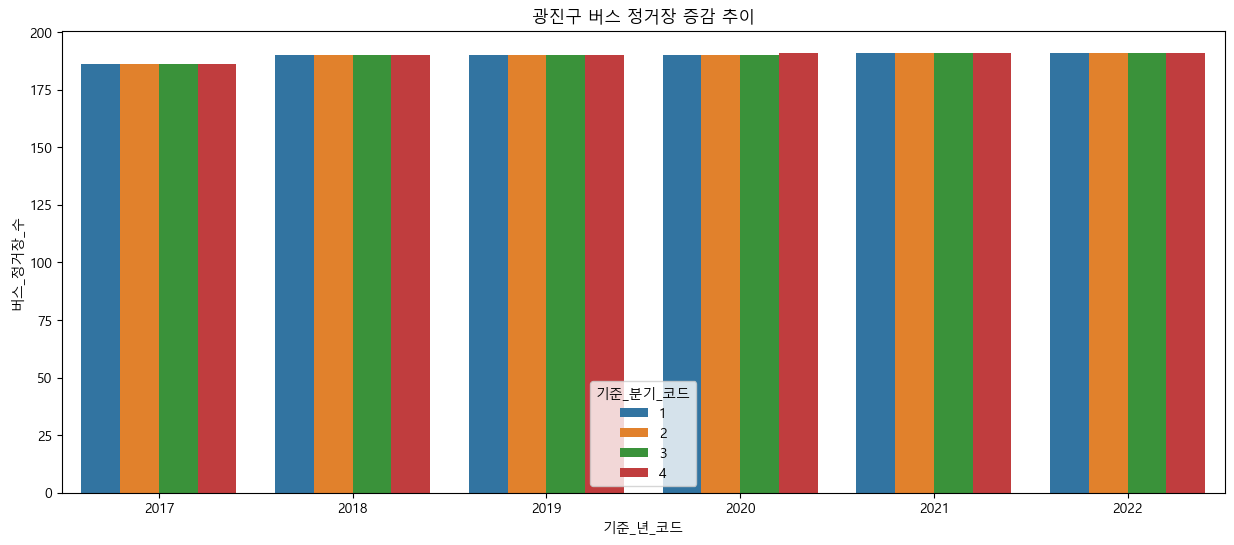

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(x='기준_년_코드', y='버스_정거장_수', data = time, hue='기준_분기_코드')
plt.title("광진구 버스 정거장 증감 추이")
plt.show()